In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_excel('data.xlsx',sheet_name=0)
data

,T,U,Ux,I,Ix,Rm,Rn,P
0,23,0.32130,1,16.3488,0.001,180.0,19.652819,0.005253
1,23,0.97010,1,48.7950,0.001,43.2,19.881135,0.047336
2,23,1.33700,1,66.4620,0.001,24.7,20.116758,0.088860
3,23,1.60420,1,78.9400,0.001,16.5,20.321763,0.126636
4,23,1.82090,1,88.7600,0.001,11.6,20.514872,0.161623
5,23,2.00110,1,96.7500,0.001,8.3,20.683204,0.193606
6,23,2.16260,1,103.7340,0.001,5.8,20.847552,0.224335
7,23,2.30330,1,109.6890,0.001,3.9,20.998459,0.252647
8,23,2.42680,1,114.7750,0.001,2.4,21.143977,0.278536
9,23,2.54310,1,119.5300,0.001,1.1,21.275830,0.303977


In [3]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

In [15]:
def obr(data,T,ax):
    dat=data[data['T']==T]
    k,b,sigk,sigb=getkb(dat.Rn,dat.P)
    print(k,b,sigk,sigb)
    p = ax.plot(dat.Rn,dat.Rn*k+b,label=r"T={0:d}$^oC$".format(T))
    print(T,"& {0:.4f} & {2:.4f} & {1:.4f} & {3:.6f}".format(k,b,sigk/k,sigb/b))
    ax.errorbar(dat.Rn,dat.P,fmt='x', color=p[0].get_color(),markersize=5,capsize=0.01, elinewidth=0.5)
    R0=-b/k
    eR0=np.sqrt((sigb/b)**2+(sigk/k)**2)
    print(R0)
    return R0, eR0

0.18402348106193842 -3.6122307903599578 0.0004957290489019032 0.00025663108369335086
23 & 0.1840 & 0.0027 & -3.6122 & -0.000071
19.629184110174272
0.18832500801231133 -3.828000547876435 0.0009732037973112872 0.0004853616623344107
33 & 0.1883 & 0.0052 & -3.8280 & -0.000127
20.32656516667286
0.19539945960700114 -4.113887067208919 0.0005440946837002848 0.0002569876800437842
43 & 0.1954 & 0.0028 & -4.1139 & -0.000062
21.053727965691465
0.20208605093301898 -4.39611666853977 0.00041096104541471187 0.00018435136747778445
53 & 0.2021 & 0.0020 & -4.3961 & -0.000042
21.75368684895948
0.20528916001164477 -4.610267405932993 0.0005727230296781857 0.0002485982645986682
63 & 0.2053 & 0.0028 & -4.6103 & -0.000054
22.45743226613369


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


array([0.00269477, 0.00516924, 0.00278523, 0.00203403, 0.00279036])

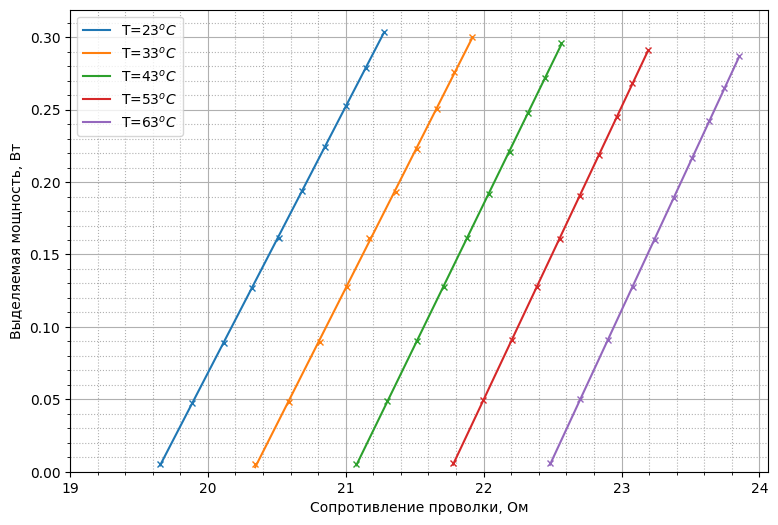

In [16]:
lR=[]
leR=[]
lT=[23,33,43,53,63]
fig,ax = plt.subplots(figsize=(9,6))
ax.set_xlabel(r"Сопротивление проволки, Ом")
ax.set_ylabel(r"Выделяемая мощность, Вт")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
for T in lT:
    r,e=obr(data,T,ax)
    lR.append(r)
    leR.append(e)
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=ax.get_xticks()[0])
if T==23:
    ax.set_xlim(xmin=19.50)
ax.legend()
fig.savefig(f"QR.eps")
lR=np.array(lR)
leR=np.array(leR)
lT=np.array(lT)
leR

In [6]:
k,b,sigk,sigb=getkb(lT,lR)
k,b,sigk/k,sigb/b

(np.float64(0.07083617994205497),
 np.float64(17.998163534017987),
 np.float64(0.0027743571938350664),
 np.float64(0.0001544202715324015))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


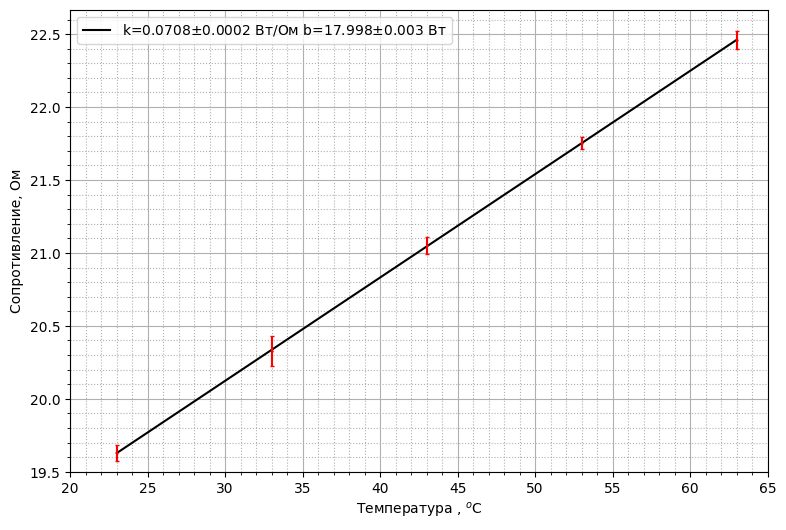

In [7]:
fig,ax = plt.subplots(figsize=(9,6))

ax.set_xlabel(r"Температура , $^o$С")
ax.set_ylabel(r"Сопротивление, Ом")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
    
ax.plot(lT,lT*k+b, color='black',label=r"k={0:.4f}$\pm${2:.4f} Вт/Ом b={1:.3f}$\pm${3:.3f} Вт".format(k,b,sigk,sigb))
ax.errorbar(lT,lR,yerr=leR*lR,fmt='.r',markersize=1.5,capsize=1.5, elinewidth=1.5)
ax.set_xlim(xmin=20)
ax.set_ylim(ymin=19.5)
ax.legend()

fig.savefig(f"alpf.eps")


In [8]:
alph=k/b
print(alph)
salph=np.sqrt((sigb/b)**2+(sigk/k)**2)
salph

0.003935744877979848


np.float64(0.0027786513741821814)

In [9]:
def obr2(data,T,R273,alph,salph,sigR):
    dat=data[data['T']==T]
    #Q=dat.P
    #dT=(dat.Rn-R273)/(alph*R273)-T
    k,b,sigk,sigb=getkb(dat.Rn,dat.P)
    #print(dT,Q)
    print(k,b,sigk,sigb)
    #plt.plot(dT,dT*k+b)
    #plt.scatter(dT,Q)
    #
    return k*(alph*R273)/(2*np.pi*0.4/np.log(7000/50)),np.sqrt((sigk/k)**2+salph**2+sigR**2)

In [10]:
np.log(7000/50)

np.float64(4.941642422609304)

In [11]:
kapa=[]
ekapa=[]
for T in lT:
    kap,ekap=obr2(data,T,b,alph,salph,sigb/b)
    kapa.append(kap)
    ekapa.append(ekap)
kapa=np.array(kapa)
ekapa=np.array(ekapa)
print(kapa,ekapa,b)

0.18402348106193842 -3.6122307903599578 0.0004957290489019032 0.00025663108369335086
0.18832500801231133 -3.828000547876435 0.0009732037973112872 0.0004853616623344107
0.19539945960700114 -4.113887067208919 0.0005440946837002848 0.0002569876800437842
0.20208605093301898 -4.39611666853977 0.00041096104541471187 0.00018435136747778445
0.20528916001164477 -4.610267405932993 0.0005727230296781857 0.0002485982645986682
[0.02563066 0.02622978 0.0272151  0.0281464  0.02859253] [0.00387318 0.00586939 0.00393679 0.00344677 0.00394055] 17.998163534017987


0.9134875698184165 -8.86363351743392 0.046983558034643276 0.0021054449019378744
0.05143316623780955


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


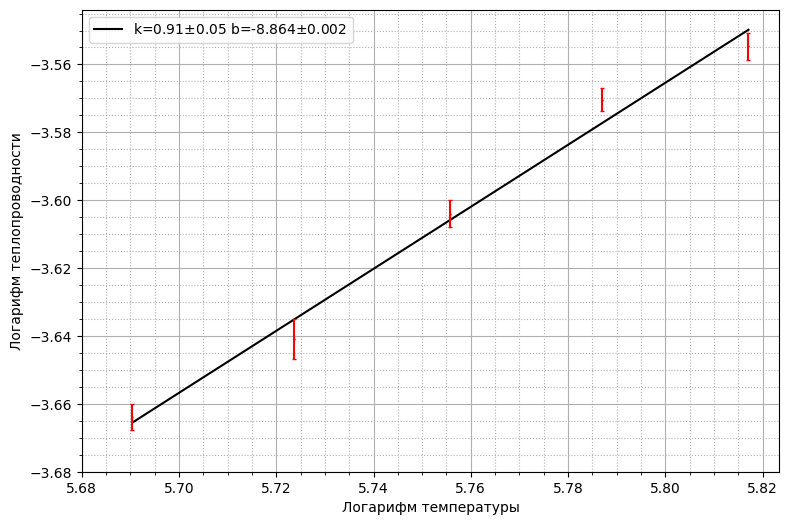

In [12]:
lT1=lT+273
kk,kb,sk,sb=getkb(np.log(lT1),np.log(kapa))
print(kk,kb,sk,sb)
print(sk/kk)

fig,ax = plt.subplots(figsize=(9,6))

ax.set_xlabel(r"Логарифм температуры")
ax.set_ylabel(r"Логарифм теплопроводности")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')

ax.plot(np.log(lT1),kk*np.log(lT1)+kb, color='black',label=r"k={0:.2f}$\pm${2:.2f} b={1:.3f}$\pm${3:.3f}".format(kk,kb,sk,sb))
#plt.scatter(np.log(lT),np.log(kapa))
ax.errorbar(np.log(lT1),np.log(kapa), yerr=ekapa,fmt='.r',markersize=1.5,capsize=1.5, elinewidth=1.5)
ax.set_xlim(xmin=ax.get_xticks()[0])
ax.set_ylim(ymin=ax.get_yticks()[0])
ax.legend()

fig.savefig(f"kapa.eps")

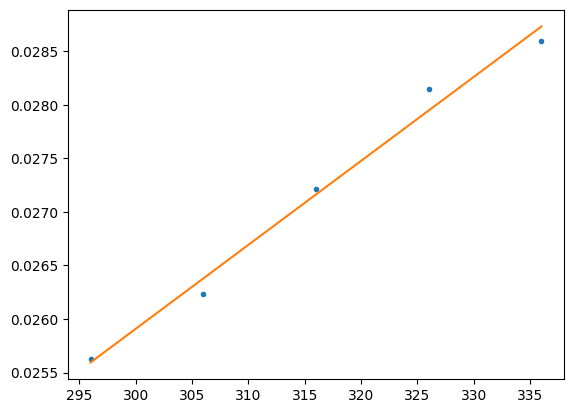

In [13]:
plt.plot(lT1,kapa,'.')
kk1,kb1,_,_=getkb(lT1,kapa)
plt.plot(lT1,lT1*kk1+kb1)